# Dark matter substructure model:

In [1]:
from subhalos_latest import *

plt.rc('font', **{'family':'sans-serif','size':15})
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

Define the main variables of the new model: 

In [2]:
M0=1e12                         #Mass of the host halo.
N_ma=200                        #number of subhalo mass values in a given range.
zmax=7                          #highest redshift value for mass accretion.
N_r=100                         #The number of radius values in the given range [0.01,1]

logmamin=4                      #The minimum subhalos' masss in units of ln(mass).
mmodel_1=5                      #This variable defines the dm/dt model for the calculation,see subhalos_latest2.py
                                #at function msolve for more details. 
    
mmodel_2=1                      #This dm/dt model correspond to the model with no spatial information.

The new model for the above parameters can be calculated:

In [3]:
#Calculating the substructure with the new model with use of spatial information:

ma200_new, rs_a_new, rhos_a_new, m0_new, rs0_new, rhos0_new, ct0_new, weight_new, survive_new,r_new  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=N_r,mmodel=mmodel_1)

ma200_new  *= Msolar
m0_new     *= Msolar
rs_a_new   *= kpc
rs0_new    *= kpc
rhos_a_new *= Msolar/pc**3
rhos0_new  *= Msolar/pc**3

rpeak_new = 2.163*rs_a_new
rmax_new  = 2.163*rs0_new
Vpeak_new = np.sqrt(4.*np.pi*G*rhos_a_new/4.625)*rs_a_new
Vmax_new  = np.sqrt(4.*np.pi*G*rhos0_new/4.625)*rs0_new

/home/tsexos/jupyter/environment/Lefteris_subhalos/substr_models/subhalos_latest.py:228: RuntimeWarning: divide by zero encountered in power
  normB=pow(2*np.pi,-0.5)*delca*0.57*pow(delca/np.sqrt(sM),-0.01)*(2./(1.-0.38))*pow(sM,-0.38/2.)*pow(xmin,0.5*(0.38-1.))*special.hyp2f1(0.5*(1-0.38),-0.38/2.,0.5*(3.-0.38),-sM/xmin)
/home/tsexos/jupyter/environment/Lefteris_subhalos/substr_models/subhalos_latest.py:228: RuntimeWarning: divide by zero encountered in true_divide
  normB=pow(2*np.pi,-0.5)*delca*0.57*pow(delca/np.sqrt(sM),-0.01)*(2./(1.-0.38))*pow(sM,-0.38/2.)*pow(xmin,0.5*(0.38-1.))*special.hyp2f1(0.5*(1-0.38),-0.38/2.,0.5*(3.-0.38),-sM/xmin)
/home/tsexos/jupyter/environment/Lefteris_subhalos/substr_models/subhalos_latest.py:166: RuntimeWarning: invalid value encountered in power
  return pow(2*np.pi,-0.5)*dela*pow(sig2-sig1,-1.5)


In [4]:
#Calculating the substructure with the initial model with no use of spatial information:

ma200_av, rs_a_av, rhos_a_av, m0_av, rs0_av, rhos0_av, ct0_av, weight_av, survive_av,r_av  \
    = rs_rhos_calc_new(M0=M0,logmamin=logmamin,N_ma=N_ma, zmax=zmax,N_r=3,mmodel=mmodel_2)

ma200_av  *= Msolar
m0_av     *= Msolar
rs_a_av   *= kpc
rs0_av    *= kpc
rhos_a_av *= Msolar/pc**3
rhos0_av  *= Msolar/pc**3

rpeak_av = 2.163*rs_a_av
rmax_av  = 2.163*rs0_av
Vpeak_av = np.sqrt(4.*np.pi*G*rhos_a_av/4.625)*rs_a_av
Vmax_av  = np.sqrt(4.*np.pi*G*rhos0_av/4.625)*rs0_av

Below I compare the model with no spatial information (mentioned as no spatial) and the updated one:

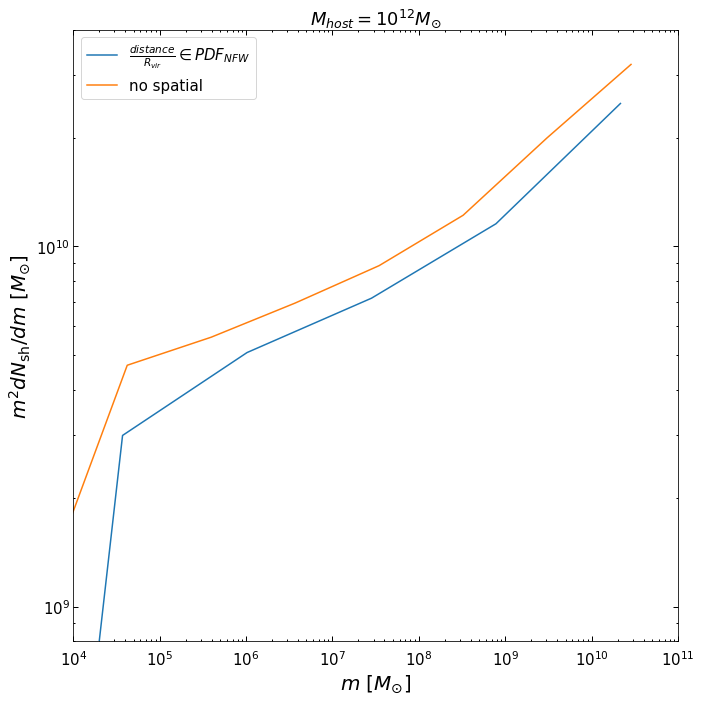

In [5]:
def plot_m2dndm(m0,weight):
    N,lnm_edges = np.histogram(np.log(m0/Msolar),weights=weight)#,bins=100)
    lnm = (lnm_edges[1:]+lnm_edges[:-1])/2.
    dlnm = lnm_edges[1:]-lnm_edges[:-1]

    m = np.exp(lnm)
    dNdlnm = N/dlnm

    dNdm   = dNdlnm/m
    

    plt.loglog(m,m**2*dNdm)
    
plt.figure(figsize=(10,10))
plot_m2dndm(m0_new,weight_new)
plot_m2dndm(m0_av,weight_av)

plt.legend([r'$\frac{distance}{R_{vir}} \in PDF_{NFW}$','no spatial'])
plt.title('$M_{host}=10^{ %i } M_{\odot}$' %np.log10(M0),loc='center')
plt.xlabel(r'$m$ [$M_{\odot}$]',fontsize=20)
plt.ylabel(r'$m^{2} dN_{\rm sh}/dm$ [$M_{\odot}$]',fontsize=20)

plt.xlim(1e4,1e11)
plt.ylim(8e8,4e10)

plt.tight_layout()


# Spatial result of the updated model and simulation

In [6]:
#Radial distribution from simulation's results:

#First results by fitting:
def Simulation_1(x):
    c=0.821
    S=1.519
    return S*(c*x**2)/(c*x**2+(1-c)*(1-x)**2)

#Second results (and better one) by fitting:
def Simulation_2(x):
    a=2.2
    c=0.606
    S=9.839
    return S*x**2/(1+(x/c)**2)**(3/a)

#Function for selecting subhalos' mass within a specific mass range,the variable m0 is an array:

def mass_selection(m_min,m_max,m0):
    mass_range_low=m0>(m_min*Msolar)
    mass_range_high=m0<(m_max*Msolar)
    return mass_range_low*mass_range_high


Radial distribution of subhalos for different subhalo mass values:

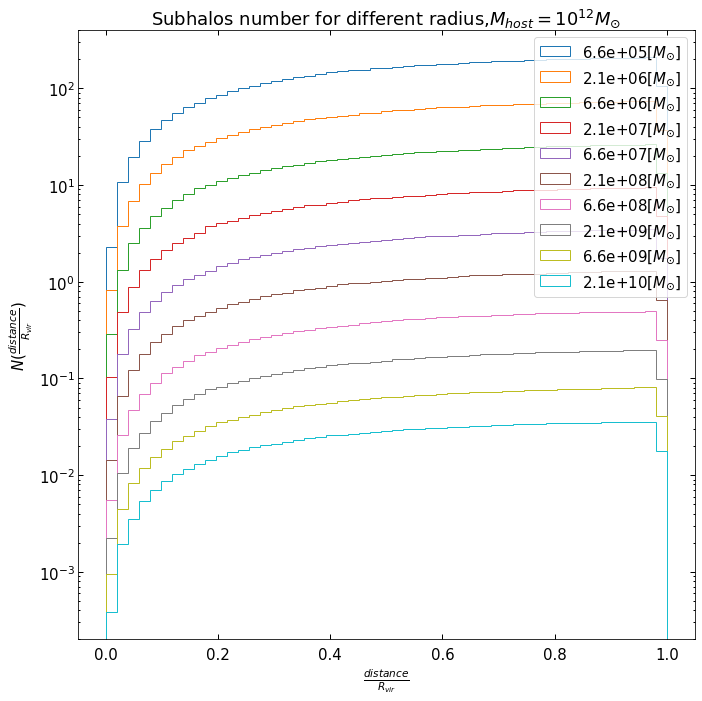

In [7]:
bins=np.linspace(0,1,52)
names=[]
plt.figure(figsize=(10,10))
plt.title(r'Subhalos number for different radius,$M_{host}=10^{12}M_{\odot}$')
for i in range(0,10):
    w=mass_selection(10**(i/2+5.5),10**(i/2+6),m0_new)
    plt.hist(r_new[w],weights=weight_new[w],histtype='step',bins=bins)
    names.append(str('{:0.1e}'.format((10**(i/2+5.5)+10**(i/2+6))/2))+str(r'$[M_{\odot}]$'))

plt.yscale('log')
plt.xlabel(r'$\frac{distance}{R_{vir}}$')
plt.ylabel(r'$N(\frac{distance}{R_{vir}})$')
plt.legend(names)
plt.tight_layout()
plt.show()


Radius linear number density of subhalos for different subhalo mass values and comparison with the results of the
simulation:

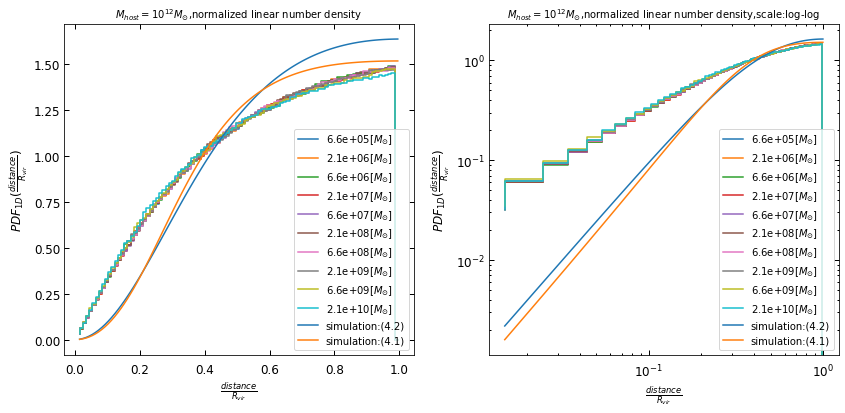

In [8]:
names=[]
bins=np.linspace(0.01,1,102)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized linear number density,scale:log-log', fontsize=10)
for i in range(0,10):
    w=mass_selection(10**(i/2+5.5),10**(i/2+6),m0_new)
    NN,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins,density=True)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    ax1.step(radius,NN)
    ax2.step(radius,NN)
    names.append(str('{:0.1e}'.format((10**(i/2+5.5)+10**(i/2+6))/2))+str(r'$[M_{\odot}]$'))
    
for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{1D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,Simulation_2(radius))
    ax.plot(radius,Simulation_1(radius))
names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
plt.tight_layout()

Normalized number density of subhalos for different subhalo mass values and comparison with the results of the
simulation:

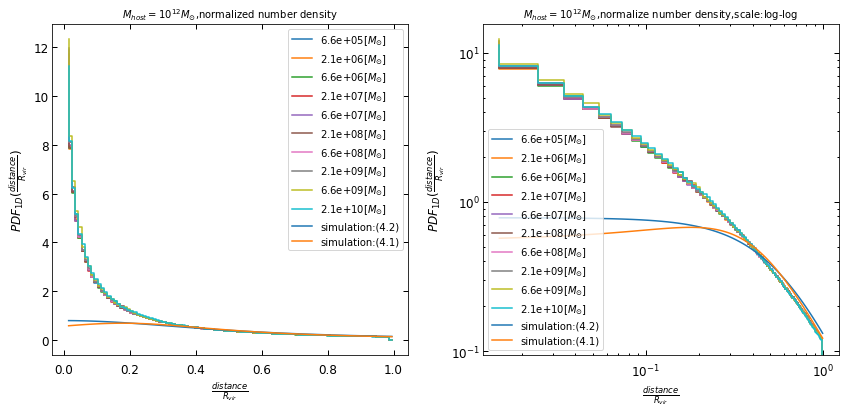

In [9]:
names=[]
bins=np.linspace(0.01,1,102)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)
ax1.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalized number density', fontsize=10)
ax2.set_title(r'$M_{host}=10^{12}M_{\odot}$,normalize number density,scale:log-log', fontsize=10)
for i in range(0,10):
    w=mass_selection(10**(i/2+5.5),10**(i/2+6),m0_new)
    NN,rr=np.histogram(r_new[w],weights=weight_new[w],bins=bins,density=True)
    radius=(rr[1:]+rr[:-1])/2.
    dr=rr[1:]-rr[:-1]
    dNdV=NN/(4*np.pi*radius**2)
    ax1.step(radius,dNdV)
    ax2.step(radius,dNdV)
    names.append(str('{:0.1e}'.format((10**(i/2+5.5)+10**(i/2+6))/2))+str(r'$[M_{\odot}]$'))
    

for ax in (ax1,ax2):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'$\frac{distance}{R_{vir}}$', fontsize=12)
    ax.set_ylabel(r'$PDF_{1D}(\frac{distance}{R_{vir}})$', fontsize=12)
    ax.plot(radius,Simulation_2(radius)/(4*np.pi*radius**2))
    ax.plot(radius,Simulation_1(radius)/(4*np.pi*radius**2))
names.append("simulation:(4.2)")
names.append("simulation:(4.1)")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.legend(names,fontsize=10,loc='best')
ax2.legend(names,fontsize=10,loc='best')
plt.tight_layout()